In [1]:
import logging
# set seed
from pprint import pprint
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
import utils as ut
import experiment as exp
import evaluation as ev
from pathlib import *
import torch
import random
import regex as re
import plot
import matplotlib.pyplot as plt
from sk_models import LocalWeightedRegression, PCR,setup_pls_models_exh,LinearRidge,CustomWrapper
import seaborn as sns

In [2]:
seed = 1
torch.manual_seed(seed)
random.seed(seed + 1)
np.random.seed(seed + 2)

random_state = np.random.RandomState(seed)

In [3]:
#we need to set parametesr
file_name = "mango_684_990.csv" #.csv" #"mango_684_990.csv" #"mango_729_975.csv" #fitlered=513-1050
id_cols =['Set','Season','Region','Date','Type','Cultivar','Pop','Temp','FruitID']#
output_cols = ['DM']

data_path = Path('D:/workspace/lazydeep/data/soil_data/')
log_path = Path("D:/workspace/lazydeep/experiments/0.02")

In [4]:
data_file = data_path / file_name
log_dir = log_path / re.sub(r'\.(?=csv$)[^.]+$', '',file_name)
if not log_dir.exists():
    log_dir.mkdir()
data = pd.read_csv(data_file)
data = ut.sample_data(data,random_state)
nrow, ncol = data.shape

n_features = ncol - 1-len(id_cols)
n_comps = [i for i in range(1,min(101,n_features))]

dataset = ut.TabularDataset(data,id_cols = id_cols, cat_cols=None, output_cols=output_cols, ignore_cols= None)

# todo write a summary
#ut.setup_logger(logger_name="",file_name=log_dir/"log.txt")
ut.setup_logger(logger_name="summary",file_name=log_dir/"summary.txt")
#tb = SummaryWriter(log_dir/"tb")
print(log_dir)

D:\workspace\lazydeep\experiments\0.02\mango_684_990


In [5]:
scores_db = pd.read_csv(log_dir/"scores.csv")

In [6]:
subset = scores_db[["model","n_comp","R2"]]
subset = subset[np.logical_not(subset["model"]=="pls_lr")]

In [7]:
#trans = np.log(subset["R2"])
#subset.loc[:,"R2"] = trans
trans = subset["model"].transform(lambda x: int(x.replace("pls_lwr_k=",""))).tolist()
subset.loc[:,"model"]=trans
subset=subset.sort_values("model",ascending=False)

In [8]:
wide = subset.pivot(index = "model",columns= "n_comp",values="R2")


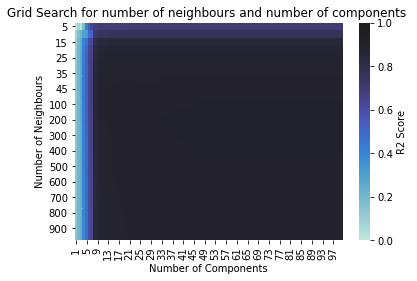

In [17]:
ax = sns.heatmap(wide, linewidth=0.0,vmin=0,vmax=1,center=1,cbar_kws={'label':"R2 Score"})

ax.set_title("Grid Search for number of neighbours and number of components ")
ax.set_xlabel("Number of Components")
ax.set_ylabel("Number of Neighbours")

plt.savefig(log_dir/"pls_heatmap.png", bbox_inches='tight')
#todo non linear colour mapping 